# 크롤링

크롤링하기 위해 설치해야 하는 것과 방법 정리

#### 유튜브 댓글 단어 빈도수 시각화,  토픽 뽑기


In [1]:
!pip install selenium

     |████████████████████████████████| 904 kB 6.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
#설치 sh 스크립트를 사용하여 필요한 라이브러리 등을 설치
!curl https://intoli.com/install-google-chrome.sh | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9526  100  9526    0     0  73844      0 --:--:-- --:--:-- --:--:-- 73844
Working in /tmp/google-chrome-installation
/tmp/google-chrome-installation /home/ec2-user/SageMaker
Configuring the Google Chrome repo in /etc/yum.repos.d/google-chrome.repo
Loaded plugins: dkms-build-requires, priorities, update-motd, upgrade-helper,
              : versionlock
amzn-main                                                | 2.1 kB     00:00     
amzn-updates                                             | 3.8 kB     00:00     
google-chrome                                            | 1.3 kB     00:00     
google-chrome/x86_64/primary                               | 1.8 kB   00:00     
google-chrome                                                               3/3
Package wget-1.18-5.30.amzn1.x86_64 already installed and latest version
Nothin

In [3]:
#설치 확인, 버전을 확인해 두도록 한다.
!/usr/bin/google-chrome-stable --version

Google Chrome 87.0.4280.88 


In [4]:
#심볼릭 림크로 크로뮴 경로 설정
!sudo ln -s /usr/bin/google-chrome-stable /usr/bin/chromium

In [5]:
#chrome driver 홈페이지에서 다운로드, 위의 chrome 버전과 아래 드라이버 버전이 다를경우 충돌할 수 있으니 확인
!wget https://chromedriver.storage.googleapis.com/86.0.4240.22/chromedriver_linux64.zip
# 현재 폴더에 압축 해재
!unzip chromedriver_linux64.zip -d .
#압축 파일 삭제
!rm chromedriver_linux64.zip
#드라이버 파일 이동
!sudo mv chromedriver /usr/bin/

--2020-12-21 07:32:32--  https://chromedriver.storage.googleapis.com/86.0.4240.22/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 216.58.192.240, 2607:f8b0:4009:803::2010
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|216.58.192.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5456932 (5.2M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   5.20M  31.8MB/s    in 0.2s    

2020-12-21 07:32:33 (31.8 MB/s) - ‘chromedriver_linux64.zip’ saved [5456932/5456932]

Archive:  chromedriver_linux64.zip
  inflating: ./chromedriver          


In [6]:
!ls

00. Basic
01.Pandas_Basic
02.Titanic
03.Visualization
04.Simple Classification
05.Clustering
06.Amazon Cloud Service Example
auto-stop-idle.log
Data Analysis
lost+found
selenium-beautifulsoup-LDA; Youtube comment analysis.ipynb
Untitled1.ipynb
Untitled.ipynb


## Selenium

In [7]:
import selenium #웹 페이지에 대한 테스트를 하기 위해서 코드로 인위의 동작을 구현. 크롤링할 때도 이용. 자료를 모아줌

In [8]:
from selenium import webdriver

In [9]:
opt = webdriver.ChromeOptions()
# 옵션을 제대로 지정안하면 실행에 실패할 수 있음으로 주의, 현재 headless 까지만 옵션으로 주어도 실행해도 된다.
opt.add_argument('--headless')
# opt.add_argument('--no-sandbox')
# opt.add_argument('--disable-dev-shm-usage')

In [10]:
driver = webdriver.Chrome(executable_path='chromedriver',options=opt)
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="fdadfb1d8394c272b3d80dfe154e8ace")>

In [11]:
driver.get('https://google.com') #구글 페이지 소스 불러오기
#driver.page_source

In [12]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [13]:
url = "https://www.youtube.com/watch?v=aLJMEs_9ZZE"

In [14]:
opt = webdriver.ChromeOptions() #옵션 지정
opt.add_argument('--headless') #리소스 낭비 줄이고자 창을 안 보이게
driver = webdriver.Chrome(executable_path='chromedriver', options=opt)

In [15]:
#코드를 사용자 행동처럼 모방해서 소스 긁어오기
SCROLL_RETRY_TIME = 0.5 #이걸 넘으면 행동 중단
RENEWAL_END_TIME = 5

## BeautifulSoup

In [16]:
!pip install BeautifulSoup4

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [17]:
from bs4 import BeautifulSoup #문서를 읽고 자료를 정리해줌

driver.get(url)

In [18]:
import time
SCROLL_PAUSE_TIME = .5 #대기하는 시간. 사용자 행동을 모방하기 때문에

body= driver.find_element_by_tag_name('body') #우리에게 보이는 부분 body
while True:
    last_height = driver.execute_script('return document.documentElement.scrollHeight') #자바스크립트. 창 크기. 
    for i in range(30):
        body.send_keys(Keys.END)
        time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script('return document.documentElement.scrollHeight')
    
    if new_height == last_height: #마지막 댓글을 찾기 위한 루프
         break;
       

In [19]:
page = driver.page_source
soup = BeautifulSoup(page, 'lxml') #간단히 해석

### Selection

In [20]:
user_names = list(map(lambda x: x.text.strip(), soup.select('#author-text > span'))) #셀렉션: 간단한 복사방법
user_comments = list(map(lambda x: x.text.strip(), soup.select('#content-text')))
user_date = list(map(lambda x: x.text.strip(), soup.select('#header-author > yt-formatted-string > a')))

In [21]:
len(user_names), len(user_comments),len(user_date)

(1580, 1580, 1580)

In [22]:
import pandas as pd
youtube = pd.DataFrame({
    'USER_NAME': user_names,
    'USER_COMMENT':user_comments,
    'DATE':user_date
})
youtube.head()

,USER_NAME,USER_COMMENT,DATE
0,Cloudy cotton,The real Emma Watson: read\nBelle: reads\nHerm...,3 months ago
1,Lauren Valencia,Emma is literally my expectation for adult Her...,2 months ago
2,T M,She. \nHasn’t .\nAged.\nA .\nBit.,2 months ago
3,Slytherin_Alika,"Everyone: Gucci, Chanel, Louis Vuitton etc\nEm...",1 month ago
4,Gowri Anil,Hermione is doing an awesome job acting as Emm...,2 months ago


## LDA

In [23]:
import sklearn
from sklearn.decomposition import LatentDirichletAllocation #LDA: 어떤 단어가 있을 때 특정 단어를 연상시킬 확률
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
youtube['USER_COMMENT']=youtube['USER_COMMENT'].map(lambda x: x.lower()) #영어일 경우에 소문자로 통일
youtube

,USER_NAME,USER_COMMENT,DATE
0,Cloudy cotton,the real emma watson: read\nbelle: reads\nherm...,3 months ago
1,Lauren Valencia,emma is literally my expectation for adult her...,2 months ago
2,T M,she. \nhasn’t .\naged.\na .\nbit.,2 months ago
3,Slytherin_Alika,"everyone: gucci, chanel, louis vuitton etc\nem...",1 month ago
4,Gowri Anil,hermione is doing an awesome job acting as emm...,2 months ago
...,...,...,...
1575,Elizabeth Staffer,i don’t think you could dislike her she’s just...,1 year ago
1576,maria fernanda,omg why does she have to be so adorable,11 months ago
1577,dolly bellsville,wtfff she is 29 she looks 20,5 months ago
1578,Anna's CraftyCorner,she is legit so adorable🥺💕,1 year ago


In [25]:
import re
youtube['USER_COMMENT']=youtube['USER_COMMENT'].map(lambda x: re.sub('[^a-z0-9 \']','',x))
#youtube['USER_COMMENT']=youtube['USER_COMMENT'].map(lambda x: re.sub('[^가-힣a-z0-9 \']','',x))b - 한글일 때

In [26]:
count_vectorizer = CountVectorizer(stop_words='english') #특정 단어 개수 세주기
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [27]:
count_data = count_vectorizer.fit_transform(youtube['USER_COMMENT'])
count_data

<1580x2405 sparse matrix of type '<class 'numpy.int64'>'
	with 8272 stored elements in Compressed Sparse Row format>

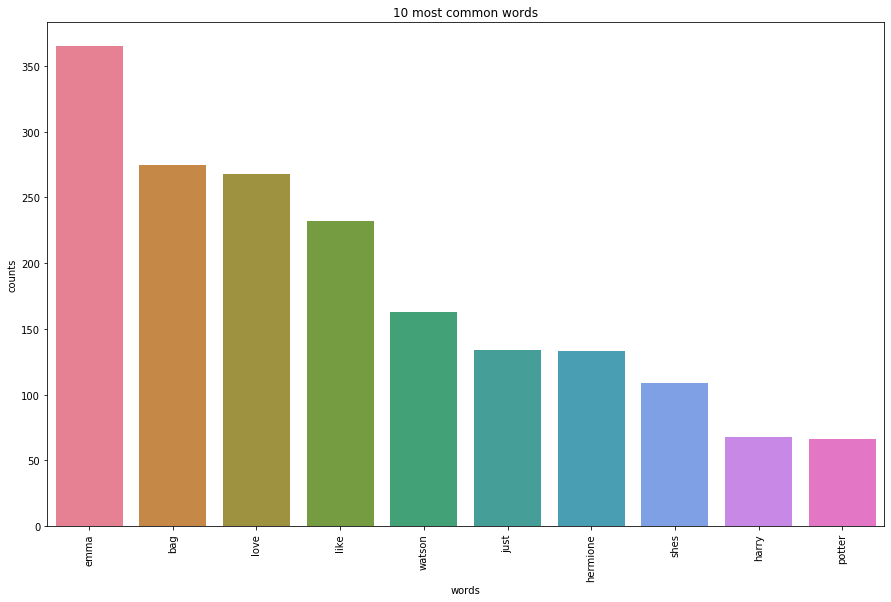

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
words = count_vectorizer.get_feature_names()
total_counts = np.zeros(len(words))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='10 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

### topic 뽑기 (연상되는 단어)

In [29]:
num_topics = 5
lda= LatentDirichletAllocation(n_components=num_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [30]:
def print_topics(model, cont_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\Topic #%d:" % topic_idx)
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words -1:-1]]))

In [31]:
num_words=5
print(print_topics(lda,count_vectorizer, num_words))

\Topic #0:
bag, extension, just, charm, undetectable
\Topic #1:
adorable, nutella, bottle, water, im
\Topic #2:
love, emma, bag, like, shes
\Topic #3:
emma, bag, watson, like, hermione
\Topic #4:
emma, watson, like, love, beautiful
None


In [32]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6 MB 6.0 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=68e92021be21fdccd84028f4e8e74f0a497f54f859df74b0f586b08311cdea9d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/de/11/0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
Successfully built pyLDAvis
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [33]:
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis

In [34]:
ldavis = pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)

In [35]:
pyLDAvis.display(ldavis)